<a href="https://colab.research.google.com/github/Raghuramvd/ML-gold-pred/blob/main/gold_silver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing


In [3]:
#loading csv to pandas data frame
gold_data = pd.read_csv('//content/gld_price_data.csv')

In [4]:
#print first five rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print last five data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
#getting some basic info about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correleation: 1.positive correlation 2.Negative correlation

In [10]:
correlation = gold_data.corr()

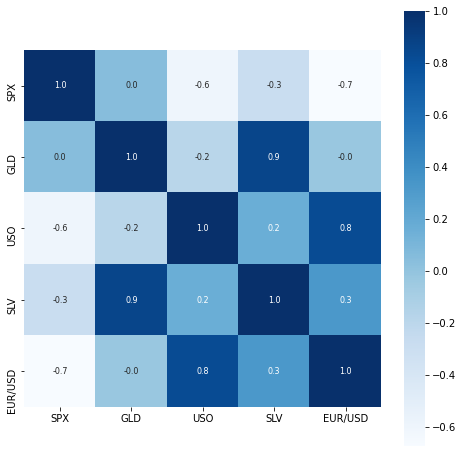

In [11]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


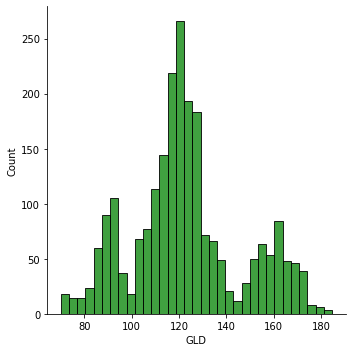

In [13]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'],color='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59c2cfab10>,
      dtype=object)

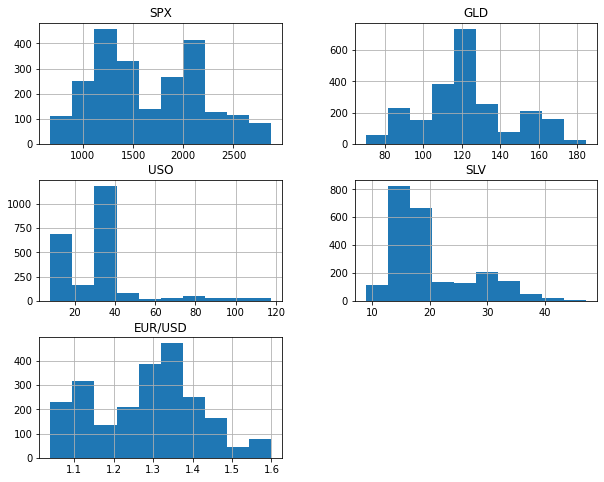

In [55]:
gold_data.hist(figsize=(10,8))

In [62]:
#Creating a year column just for some data visualization
gold_data['Year'] =gold_data['Date'].apply(lambda x: x.year)

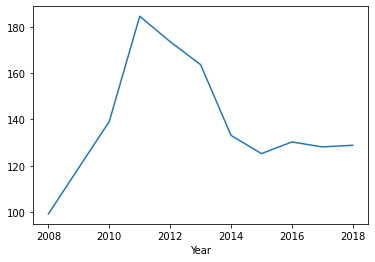

In [63]:
#We can see how the maximum gold value changed from 2008 to 2018
gold_data.groupby('Year').max()['GLD'].plot()

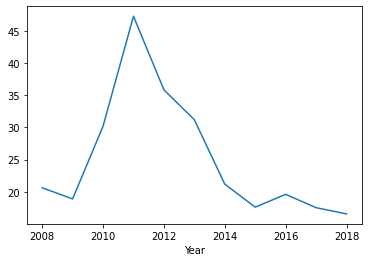

In [64]:
#We can see how the maximum gold value changed from 2008 to 2018
gold_data.groupby('Year').max()['SLV'].plot()

splitting the features and target (gold and date)

In [14]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training data and test data 

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

model Training: Random forest Regressor 

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model evaluation

In [22]:
#prediction on Test Data
test_data_prediction=regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[168.86099963  81.89369996 116.35350055 127.5238006  120.78680113
 154.70719771 150.85549936 126.05760044 117.47429887 126.08200062
 116.78320102 171.9118005  141.76029851 167.74959881 115.0128003
 117.57540053 138.94790344 170.57160116 159.90200367 162.16150002
 154.98210043 125.24880025 176.62659954 157.3202039  125.25850061
  93.87779971  77.72130039 120.48239991 119.1243995  167.55419906
  88.01990017 125.28040021  91.22750083 117.69040029 121.1781992
 136.14650076 115.59040129 115.14740045 147.55629973 107.29230112
 104.56920253  87.22889768 126.44020038 117.98310007 153.55699908
 119.51600022 108.31490016 108.09619812  93.21490047 127.17169777
  74.56530043 113.57269881 121.41160029 111.2306991  118.92409921
 121.13649944 159.98279977 169.20160092 146.90139677  85.88909853
  94.37770019  86.86229925  90.53730009 119.11990043 126.43080059
 127.53620028 169.62859982 122.35859942 117.251899    98.41690015
 167.93900165 143.36029865 132.10420301 121.27380219 120.34599963
 119.6574006

In [24]:
#R square error
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R square error:",error_score)

R square error: 0.9894433893045417


compare the actual value and predicted values in a plot 

In [25]:
#Y_test to list convertion so we dont get errors 
Y_test=list(Y_test)

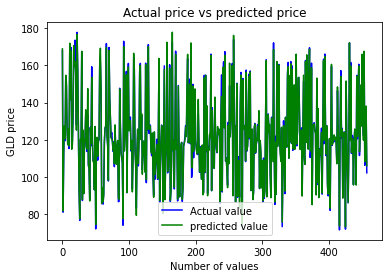

In [26]:
plt.plot(Y_test, color='blue', label='Actual value')
plt.plot(test_data_prediction, color='green',label='predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

silver

In [27]:
R=gold_data.drop(['Date','SLV'],axis=1)
A=gold_data['SLV']

In [29]:
print(R)

              SPX         GLD        USO   EUR/USD
0     1447.160034   84.860001  78.470001  1.471692
1     1447.160034   85.570000  78.370003  1.474491
2     1411.630005   85.129997  77.309998  1.475492
3     1416.180054   84.769997  75.500000  1.468299
4     1390.189941   86.779999  76.059998  1.557099
...           ...         ...        ...       ...
2285  2671.919922  124.589996  14.060000  1.186789
2286  2697.790039  124.330002  14.370000  1.184722
2287  2723.070068  125.180000  14.410000  1.191753
2288  2730.129883  124.489998  14.380000  1.193118
2289  2725.780029  122.543800  14.405800  1.182033

[2290 rows x 4 columns]


In [30]:
print(A)

0       15.1800
1       15.2850
2       15.1670
3       15.0530
4       15.5900
         ...   
2285    15.5100
2286    15.5300
2287    15.7400
2288    15.5600
2289    15.4542
Name: SLV, Length: 2290, dtype: float64


In [45]:
R_train, R_test, A_train, A_test = train_test_split(R,A, test_size = 0.2, random_state=2)

model Training: Random forest Regressor 

In [46]:
regressor1 = RandomForestRegressor(n_estimators=100)

In [47]:
#training the model
regressor1.fit(R_train,A_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model evaluation

In [50]:
#prediction on Test Data
test_data_prediction1=regressor1.predict(R_test)

In [49]:
print(test_data_prediction1)

[169.7611003  147.11259793 104.5468988  103.20479932 102.85829957
 166.87169879 142.55119974 103.20479932 165.62429915 168.00059982
 154.99929843 143.25310045 166.56489886 167.43139987 120.87089965
 102.79429944 164.11900085 167.44839956 167.91600016 141.79860104
 167.51089958 167.75930013 145.94940036 143.42269936 103.20479932
 145.63239985 149.72969875 146.81980074 160.96780085 163.16059943
 147.06160091 103.20479932 150.34359928 104.6239986  167.11229951
 167.31780001 121.89500015 112.6653998  166.99119968 111.76620022
 144.94800114 149.59210066 103.20479932 166.57940003 167.5915996
 159.44659872 104.60389868 112.60159999 149.59210066 154.55420016
 167.72199966 128.8871017  103.4692992  117.17849988 103.20479932
 167.51089958 168.4744     145.3852003  147.09159761 149.59210066
 149.59210066 148.82770046 136.19870101 103.20479932 103.20479932
 147.90700062 169.84989975 103.20479932 161.42040046 149.67540035
 167.64070008 145.89989747 145.02580089 163.64049975 167.47669943
 164.103098

In [51]:
#R square error
error_score=metrics.r2_score(A_test, test_data_prediction1)
print("R square error:",error_score)

R square error: 0.9939146218381676


compare the actual value and predicted values in a plot 

In [52]:
#A_test to list convertion so we dont get errors 
A_test=list(A_test)

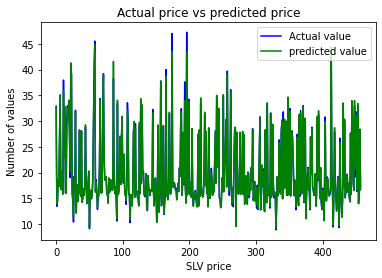

In [54]:
plt.plot(A_test, color='blue', label='Actual value')
plt.plot(test_data_prediction1, color='green',label='predicted value')
plt.title('Actual price vs predicted price')
plt.ylabel('Number of values')
plt.xlabel('SLV price')
plt.legend()
plt.show()